<a href="https://colab.research.google.com/github/akash-r34/CalCheck/blob/main/Dataset/Mining%20min.%20macros%20for%20users%20and%20recommend%20diet%20plans/Mining_user_macros_based_on_BMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Generate macros based on BMI for different users

#Step 1: Generating random height and weight for 100 users
This process may generate some abnormal height and weight, which will be removed in the upcoming code blocks.

In [ ]:
import random
from random import uniform

height = []
weight = []
bmi = []
for i in range(100):
    h = round(random.uniform(140.0,190.0),2)
    if h >= 140.0 and h <= 150.0:
        bmi.append([h,round(random.uniform(30.0,70.0),2)])
#         height += [h]
#         weight += [round(random.uniform(40.0,70.0),2)]
    elif h >= 150.01 and h <= 170.0:
        bmi.append([h,round(random.uniform(40.01,90.0),2)])
#         height += [h]
#         weight += [round(random.uniform(70.1,140.0),2)]
    elif h >= 170.01 and  h <= 180.0:
        bmi.append([h,round(random.uniform(70.01,100.0),2)])
    else:
        bmi.append([h,round(random.uniform(100.01,110.0),2)])
#     height += [round(random.uniform(120.0,200.0),2)]
    

#Step 2: Calculate BMI with the generated height and weight
Additionaly we also give the BMI range based on the calculated BMI. This is in the form of categorical data with four types - "Underweight", "Normal", "Overweight", "Obesity".

In [ ]:
bmi_list = []
for i in bmi:
    data = {}
    data['Height'] = i[0]
    data['Weight'] = i[1]
    data['bmi'] = round((i[1]/(i[0]**2))*10000,2)
    if data['bmi'] < 18.5:
        data["bmi_range"] = "Underweight"
    elif data['bmi'] >= 18.5  and data['bmi'] < 24.9:
        data["bmi_range"] = "Normal"
    elif data['bmi'] >= 24.9 and data['bmi'] < 30.0:
        data['bmi_range'] = "Overweight"
    else:
        data['bmi_range'] = "Obesity"

    bmi_list.append(data)


In [ ]:
bmi_list

[{'Height': 177.74, 'Weight': 74.74, 'bmi': 23.66, 'bmi_range': 'Normal'},
 {'Height': 149.72, 'Weight': 38.52, 'bmi': 17.18, 'bmi_range': 'Underweight'},
 {'Height': 142.78, 'Weight': 45.87, 'bmi': 22.5, 'bmi_range': 'Normal'},
 {'Height': 160.85, 'Weight': 61.73, 'bmi': 23.86, 'bmi_range': 'Normal'},
 {'Height': 182.25, 'Weight': 105.28, 'bmi': 31.7, 'bmi_range': 'Obesity'},
 {'Height': 162.7, 'Weight': 66.38, 'bmi': 25.08, 'bmi_range': 'Overweight'},
 {'Height': 144.64, 'Weight': 39.99, 'bmi': 19.12, 'bmi_range': 'Normal'},
 {'Height': 168.9, 'Weight': 88.78, 'bmi': 31.12, 'bmi_range': 'Obesity'},
 {'Height': 160.26, 'Weight': 59.08, 'bmi': 23.0, 'bmi_range': 'Normal'},
 {'Height': 178.83, 'Weight': 96.13, 'bmi': 30.06, 'bmi_range': 'Obesity'},
 {'Height': 156.77, 'Weight': 71.36, 'bmi': 29.04, 'bmi_range': 'Overweight'},
 {'Height': 183.84, 'Weight': 107.91, 'bmi': 31.93, 'bmi_range': 'Obesity'},
 {'Height': 157.06, 'Weight': 86.79, 'bmi': 35.18, 'bmi_range': 'Obesity'},
 {'Height'

#Step 3: Create a panda dataframe with generated data

In [ ]:
import pandas as pd


In [ ]:
df = pd.DataFrame(bmi_list)
df

,Height,Weight,bmi,bmi_range
0,177.74,74.74,23.66,Normal
1,149.72,38.52,17.18,Underweight
2,142.78,45.87,22.50,Normal
3,160.85,61.73,23.86,Normal
4,182.25,105.28,31.70,Obesity
...,...,...,...,...
95,147.82,45.29,20.73,Normal
96,180.27,103.48,31.84,Obesity
97,183.51,107.12,31.81,Obesity
98,164.39,85.51,31.64,Obesity


#Step 4: Calculate minimum Macro intake data for all users
We use a online macro calculator https://www.calculator.net/macro-calculator.html for this task. We mine the website for the minimum macro intake data of different users by giving their height and weight as parameters. We use a python package called BeautifulSoup for accomplishing this task.

In [ ]:
import requests
from bs4 import BeautifulSoup

macros_data = []

for height, weight in zip(df['Height'], df['Weight']):
  # Input variables
  #height = 170 # height in cm
  #weight = 70 # weight in kg

  url = "https://www.calculator.net/macro-calculator.html"

  params = {
      "ctype": "metric",
      "cage": 25,
      "csex": "m",
      "cheightmeter": height,
      "ckg": weight,
      "cactivity": 1.375,
      "printit": 0,
      "x": 121,
      "y": 28
  }

  response = requests.get(url, params=params)

  # Create a Beautiful Soup object
  soup = BeautifulSoup(response.content, 'html.parser')

  # Find the recommended daily calorie intake
  macros = dict()

  labels = soup.find_all('td', {'class': 'arrow_box'})
  values = soup.find_all('td', {'class': 'result_box'})
  for label, value in zip(labels, values):
    temp_lab = label.div.text.strip()
    temp_val = value.text.replace('<', '').replace(':', '').strip().split(" ")
    macros[temp_lab+" ("+temp_val[1]+")"] = temp_val[0]
  print(macros)
  macros_data.append(macros)

{'Protein (grams/day)': '146', 'Carbs (grams/day)': '319', 'Fat (grams/day)': '68', 'Sugar (grams/day)': '64', 'Saturated Fat (grams/day)': '27', 'Food Energy (Calories/dayor)': '2,390'}
{'Protein (grams/day)': '101', 'Carbs (grams/day)': '220', 'Fat (grams/day)': '47', 'Sugar (grams/day)': '44', 'Saturated Fat (grams/day)': '19', 'Food Energy (Calories/dayor)': '1,651'}
{'Protein (grams/day)': '103', 'Carbs (grams/day)': '226', 'Fat (grams/day)': '48', 'Sugar (grams/day)': '45', 'Saturated Fat (grams/day)': '19', 'Food Energy (Calories/dayor)': '1,693'}
{'Protein (grams/day)': '126', 'Carbs (grams/day)': '275', 'Fat (grams/day)': '59', 'Sugar (grams/day)': '55', 'Saturated Fat (grams/day)': '23', 'Food Energy (Calories/dayor)': '2,066'}
{'Protein (grams/day)': '174', 'Carbs (grams/day)': '380', 'Fat (grams/day)': '81', 'Sugar (grams/day)': '76', 'Saturated Fat (grams/day)': '32', 'Food Energy (Calories/dayor)': '2,849'}
{'Protein (grams/day)': '131', 'Carbs (grams/day)': '286', 'Fat (

##Create a dataframe from the mined data

In [ ]:
macros_df = pd.DataFrame(macros_data)
macros_df

,Protein (grams/day),Carbs (grams/day),Fat (grams/day),Sugar (grams/day),Saturated Fat (grams/day),Food Energy (Calories/dayor)
0,146,319,68,64,27,"2,390"
1,101,220,47,44,19,"1,651"
2,103,226,48,45,19,"1,693"
3,126,275,59,55,23,"2,066"
4,174,380,81,76,32,"2,849"
...,...,...,...,...,...,...
95,105,230,49,46,20,"1,728"
96,171,374,80,75,32,"2,807"
97,176,385,82,77,33,"2,885"
98,148,323,69,65,28,"2,423"


#Step 5: Merge both the dataframes
We join both the dataframes and drop all the NaN rows.

> Note: We drop all the NaN rows to remove any abnormal height and weight that may have been generated before. 



In [ ]:
final_df = df.join(macros_df)
final_df = final_df.dropna()
final_df

,Height,Weight,bmi,bmi_range,Protein (grams/day),Carbs (grams/day),Fat (grams/day),Sugar (grams/day),Saturated Fat (grams/day),Food Energy (Calories/dayor)
0,177.74,74.74,23.66,Normal,146,319,68,64,27,"2,390"
1,149.72,38.52,17.18,Underweight,101,220,47,44,19,"1,651"
2,142.78,45.87,22.50,Normal,103,226,48,45,19,"1,693"
3,160.85,61.73,23.86,Normal,126,275,59,55,23,"2,066"
4,182.25,105.28,31.70,Obesity,174,380,81,76,32,"2,849"
...,...,...,...,...,...,...,...,...,...,...
95,147.82,45.29,20.73,Normal,105,230,49,46,20,"1,728"
96,180.27,103.48,31.84,Obesity,171,374,80,75,32,"2,807"
97,183.51,107.12,31.81,Obesity,176,385,82,77,33,"2,885"
98,164.39,85.51,31.64,Obesity,148,323,69,65,28,"2,423"


#Step 6: Export dataset

In [ ]:
# storing into the excel file
final_df.to_excel("Min_macros_for_height_and_weight.xlsx")

#Task 2: Assign dietIDs to user based on their minimum nutrient intake level

#Step 1: Import User macros dataset and diet plan dataset

In [ ]:
user_macros_df = pd.read_excel("/content/Min_macros_for_height_and_weight.xlsx")
diet_id_df = pd.read_excel("/content/Food_data_generated_with_dietIDs.xlsx", index_col=0)

In [ ]:
diet_id_df

,dietID,Food name,Protein(g),Total lipid (fat)(g),"Carbohydrate, by difference(g)",Energy(kcal),"Alcohol, ethyl(g)",Water(g),Caffeine(mg),Theobromine(mg),...,PUFA 20:4(g),PUFA 22:6 n-3 (DHA)(g),MUFA 16:1(g),PUFA 18:4(g),MUFA 20:1(g),PUFA 20:5 n-3 (EPA)(g),MUFA 22:1(g),PUFA 22:5 n-3 (DPA)(g),"Fatty acids, total monounsaturated(g)","Fatty acids, total polyunsaturated(g)"
0,1005,Idli,6.36,0.35,25.00,128,0,67.20,0,0,...,0.000,0.0,0.001,0.0,0.002,0.0,0.000,0.0,0.090,0.142
1,1003,"Dosa, plain",5.70,4.05,37.00,210,0,51.80,0,0,...,0.000,0.0,0.014,0.0,0.027,0.0,0.003,0.0,1.590,1.610
2,1005,"Dosa, with filling",5.46,4.27,30.80,184,0,57.90,0,0,...,0.000,0.0,0.014,0.0,0.026,0.0,0.002,0.0,1.610,1.720
3,1005,"Bread, puri",6.84,24.90,39.20,409,0,28.00,0,0,...,0.001,0.0,0.083,0.0,0.167,0.0,0.000,0.0,9.710,10.000
4,1001,Vada,12.80,9.73,33.20,266,0,42.00,0,0,...,0.000,0.0,0.034,0.0,0.066,0.0,0.000,0.0,3.810,3.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1004,Lentil curry,3.67,5.61,12.30,110,0,76.70,0,0,...,0.000,0.0,0.018,0.0,0.030,0.0,0.000,0.0,1.890,1.990
141,1005,"Ghee, clarified butter",0.28,99.50,0.00,876,0,0.24,0,0,...,0.000,0.0,2.230,0.0,0.000,0.0,0.000,0.0,28.700,3.690
142,1002,Date,2.45,0.39,75.00,282,0,20.50,0,0,...,0.000,0.0,0.001,0.0,0.000,0.0,0.000,0.0,0.036,0.019
143,1006,"Mayonnaise, reduced fat, with olive oil",0.37,40.00,0.00,361,0,57.60,0,0,...,0.000,0.0,0.464,0.0,0.125,0.0,0.000,0.0,29.500,4.010


##Converting the string string values to integer values

In [ ]:
user_macros_df = user_macros_df.dropna()
user_macros_df["Food Energy (Calories/day)"] = user_macros_df["Food Energy (Calories/day)"].str.replace(',','')
user_macros_df

<ipython-input-56-26743a48dbcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_macros_df["Food Energy (Calories/day)"] = user_macros_df["Food Energy (Calories/day)"].str.replace(',','')


,Unnamed: 0,Height,Weight,bmi,bmi_range,Protein (grams/day),Carbs (grams/day),Fat (grams/day),Sugar (grams/day),Saturated Fat (grams/day),Food Energy (Calories/day)
0,0,177.74,74.74,23.66,Normal,146.0,319.0,68.0,64.0,27.0,2390
1,1,149.72,38.52,17.18,Underweight,101.0,220.0,47.0,44.0,19.0,1651
2,2,142.78,45.87,22.50,Normal,103.0,226.0,48.0,45.0,19.0,1693
3,3,160.85,61.73,23.86,Normal,126.0,275.0,59.0,55.0,23.0,2066
4,4,182.25,105.28,31.70,Obesity,174.0,380.0,81.0,76.0,32.0,2849
...,...,...,...,...,...,...,...,...,...,...,...
95,95,147.82,45.29,20.73,Normal,105.0,230.0,49.0,46.0,20.0,1728
96,96,180.27,103.48,31.84,Obesity,171.0,374.0,80.0,75.0,32.0,2807
97,97,183.51,107.12,31.81,Obesity,176.0,385.0,82.0,77.0,33.0,2885
98,98,164.39,85.51,31.64,Obesity,148.0,323.0,69.0,65.0,28.0,2423


#Step 2: Aggregate each default diet plans by their macro levels

In [ ]:
grouped_diet_id = diet_id_df.groupby(by="dietID")
macro_names = ["Protein(g)", "Carbohydrate, by difference(g)", "Total lipid (fat)(g)", "Sugars, total including NLEA(g)", "Energy(kcal)"]
grouped_macros = grouped_diet_id[macro_names].sum()
grouped_macros

,Protein(g),"Carbohydrate, by difference(g)",Total lipid (fat)(g),"Sugars, total including NLEA(g)",Energy(kcal)
dietID,,,,,
1001,121.94,462.87,137.07,107.18,3565
1002,141.36,464.99,282.09,210.02,4898
1003,194.94,638.27,219.39,149.12,5271
1004,174.13,399.36,158.96,134.79,3714
1005,233.33,603.83,390.02,121.57,6812
1006,168.29,748.45,209.06,185.22,5520


## Create a heatmap for the aggregated data
Just for better interpretation

<Axes: ylabel='dietID'>

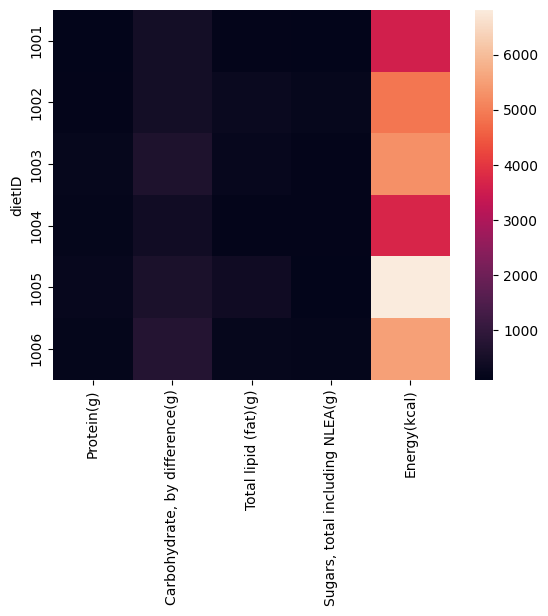

In [ ]:
import seaborn as sns
sns.heatmap(grouped_macros)

## Convert the aggregated data into pandas dataframe

In [ ]:
macros_dietID_aggr = pd.DataFrame(grouped_macros)
macros_dietID_aggr

,Protein(g),"Carbohydrate, by difference(g)",Total lipid (fat)(g),"Sugars, total including NLEA(g)",Energy(kcal)
dietID,,,,,
1001,121.94,462.87,137.07,107.18,3565
1002,141.36,464.99,282.09,210.02,4898
1003,194.94,638.27,219.39,149.12,5271
1004,174.13,399.36,158.96,134.79,3714
1005,233.33,603.83,390.02,121.57,6812
1006,168.29,748.45,209.06,185.22,5520


#Step 3: Assign recommended dietIDs to all the users
If the minimum macro levels intake of the user is less than or equal to a diet plan's macro level, then recommend that plan to the user.

In [ ]:
user_diet_recom=[]
user_diet = dict()
for uid, uprotein, ucarbs, ufat, usugar, uenergy in zip(user_macros_df["Unnamed: 0"], user_macros_df["Protein (grams/day)"], user_macros_df["Carbs (grams/day)"], user_macros_df["Fat (grams/day)"], user_macros_df["Sugar (grams/day)"], user_macros_df["Food Energy (Calories/day)"]):
  for id, protein, carbs, fat, sugar, energy in zip(macros_dietID_aggr.index, macros_dietID_aggr["Protein(g)"], macros_dietID_aggr["Carbohydrate, by difference(g)"], macros_dietID_aggr["Total lipid (fat)(g)"], macros_dietID_aggr["Sugars, total including NLEA(g)"], macros_dietID_aggr["Energy(kcal)"]):
    if(float(uprotein)<=float(protein) and float(ucarbs)<=float(carbs) and float(ufat)<=float(fat) and float(usugar)<=float(sugar) and float(uenergy)<=float(energy)):
      user_diet ["UserID"] = "User " + str(uid)
      user_diet ["Protein (grams/day)"] = float(uprotein) 
      user_diet ["Carbs (grams/day)"] = float(ucarbs)
      user_diet ["Fat (grams/day)"] = float(ufat)
      user_diet ["Sugar (grams/day)"] = float(usugar)
      user_diet ["Food Energy (Calories/day)"] = float(uenergy)
      user_diet["Diet Protein(g)"] = float(protein) 
      user_diet["Diet Carbohydrate, by difference(g)"] = float(carbs)
      user_diet["Diet Total lipid (fat)(g)"] = float(fat)
      user_diet["Diet Sugars, total including NLEA(g)"] = float(sugar)
      user_diet["Diet Energy(cal)"] = float(energy)
      user_diet ["DietID"] = id
      user_diet_recom.append(user_diet)
      user_diet = dict()

user_diet_recom_df = pd.DataFrame(user_diet_recom)
user_diet_recom_df

,UserID,Protein (grams/day),Carbs (grams/day),Fat (grams/day),Sugar (grams/day),Food Energy (Calories/day),Diet Protein(g),"Diet Carbohydrate, by difference(g)",Diet Total lipid (fat)(g),"Diet Sugars, total including NLEA(g)",Diet Energy(cal),DietID
0,User 0,146.0,319.0,68.0,64.0,2390.0,194.94,638.27,219.39,149.12,5271.0,1003
1,User 0,146.0,319.0,68.0,64.0,2390.0,174.13,399.36,158.96,134.79,3714.0,1004
2,User 0,146.0,319.0,68.0,64.0,2390.0,233.33,603.83,390.02,121.57,6812.0,1005
3,User 0,146.0,319.0,68.0,64.0,2390.0,168.29,748.45,209.06,185.22,5520.0,1006
4,User 1,101.0,220.0,47.0,44.0,1651.0,121.94,462.87,137.07,107.18,3565.0,1001
...,...,...,...,...,...,...,...,...,...,...,...,...
428,User 98,148.0,323.0,69.0,65.0,2423.0,168.29,748.45,209.06,185.22,5520.0,1006
429,User 99,164.0,359.0,77.0,72.0,2696.0,194.94,638.27,219.39,149.12,5271.0,1003
430,User 99,164.0,359.0,77.0,72.0,2696.0,174.13,399.36,158.96,134.79,3714.0,1004
431,User 99,164.0,359.0,77.0,72.0,2696.0,233.33,603.83,390.02,121.57,6812.0,1005


#Step 4: Export the resulting dataset

In [ ]:
user_diet_recom_df.to_excel("Diet_recommendation_based_on_user.xlsx")